# Punto VI del proyecto final de Monte Carlo

## Calcular el coeficiente a(n) (reducido)
$$
a^{*}(n^{*}) = \frac{2\pi}{T^{*}}\int_{1}^{\lambda}g_{HS}(r^{*})r^{*^2}dr^{*}
$$



In [2]:
import pandas as pd 
import numpy as np 
import statsmodels.api as sm
import matplotlib as plt 
from pylab import figure, show, legend, ylabel
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from matplotlib import rc
import scipy.stats as stats
from datetime import datetime
from scipy import integrate
%matplotlib inline

# LECTURA Y FORMATO DE ARCHIVO

In [4]:
# LECTURA DEL ARCHIVO ----------------------------------------------------------------------------
df=pd.read_csv("06g(r)_0.48.dat", header=None, delimiter=r"\s+", names=['RT', 'GDRTA'])
    # Anotaciones: 
        # 1. header=None indica que las columnas no tienen encabezado.
        # 2. names indica los nombres que se le asignarán a cada columna (el orden importa).
        # 3. r"\s+" indica que las columnas del archivo están separados por al menos un espacio.
# ------------------------------------------------------------------------------------------------


# MOSTRAR LOS PRIMEROS X = 5 NÚMEROS DEL ARCHIVO ---
df.head(5)
# --------------------------------------------------

,TIME,WT,DIF
0,0.002,0.002000,0.999919
1,0.004,0.003998,0.999387
2,0.006,0.005996,0.999306
3,0.008,0.007997,0.999678
4,0.010,0.010000,0.999994


In [90]:
# Construir un arreglo df1 que solo contenga información de la g(r*) en el intervalo [1,λ]. 
# Se debe seleccionar el rango en la instrucción "....iloc[límite inferior-1, límite superior]"
df1 = df.iloc[2000:2501]
df1.head(1)

,RT,GDRTA
2000,1.00025,2.082937


In [91]:
# DEFINICIÓN DE PARÁMETROS DE LA INTEGRAL --
lam = 1.25
TS1 = 1.0
# ------------------------------------------

# GRÁFICA Y AJUSTE

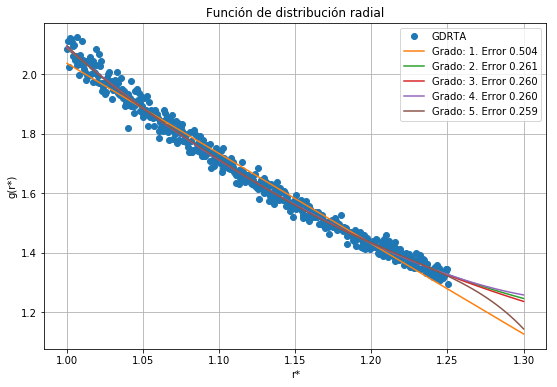

array([ -1422.54251205,   8043.66290556, -18170.36516172,  20502.13326779,
       -11560.26709152,   2609.47352923])

In [92]:
# TAMAÑO DE LA FIGURA -------
fig = plt.gcf()
fig.set_size_inches(9, 6)
# ---------------------------


# DATOS --------
x=df1[u'RT']
y=df1[u'GDRTA']
# --------------


# AJUSTE --------------------------------
sols = {}
for grado in range(1,6):
  z = np.polyfit(x, y, grado, full=True)
  sols[grado] = z
# ---------------------------------------   


# GRAFICAR DATOS ----
plt.plot(x, y, 'o')
# -------------------


# ETIQUETAS ---------------------------------
plt.xlabel('r*')
plt.ylabel('g(r*)')
plt.title('Función de distribución radial')
# -------------------------------------------


# AJUSTE DE POLINOMIO ----------------------------------------------------
xp = np.linspace(1, 1.3, 100)
for grado, sol in sols.items():
  coefs, error, *_ = sol
  p = np.poly1d(coefs)
  plt.plot(xp, p(xp), "-", label="Grado: %s. Error %.3f" % (grado, error) )
# ------------------------------------------------------------------------


# GRÁFICA -----
plt.legend()
plt.grid(True)
plt.show()
# -------------


# IMPRIMIR COEFICIENTES DEL ÚLTIMO POLINOMIO FINAL AJUSTADO -
coefs
# -----------------------------------------------------------

# INTEGRACIÓN USANDO EL AJUSTE POLINOMIAL DE GRADO 5 EN TODOS LOS CASOS

In [52]:
# Para n*=0.05
I05 = lambda x: (2*np.pi/TS1)*(1504.91823576*x**5-8442.73901849*x**4+18919.00855902*x**3-21166.59938185*x**2+11822.80730982*x-2636.32878168)*x**2
integrate.quad(I05, 1, lam)

(2.090137016255666, 2.3205182400683655e-14)

In [53]:
# Para n*=0.1
I1 = lambda x: (2*np.pi/TS1)*(1005.19346811*x**5-5590.59495031*x**4+12411.72021048*x**3-13748.59615434*x**2+7597.98899965*x-1674.5599930)*x**2
integrate.quad(I1, 1, lam)

(2.2049874209145757, 2.4480278037082033e-14)

In [54]:
# Para n*=0.15
I15 = lambda x: (2*np.pi/TS1)*(14.04216645*x**5-18.81086697*x**4-93.79018369*x**3+258.80323194*x**2-231.99137276*x+72.97727126)*x**2
integrate.quad(I15, 1, lam)

(2.3196738089115585, 2.5753552722735478e-14)

In [55]:
# Para n*=0.2
I2 = lambda x: (2*np.pi/TS1)*(845.93049472*x**5-4803.60236522*x**4+10894.57651095*x**3-12335.49868699*x**2+6971.89604353*x-1572.00239092)*x**2
integrate.quad(I2, 1, lam)

(2.4326355503740342, 2.7007679985469426e-14)

In [56]:
# Para n*=0.3
I3 = lambda x: (2*np.pi/TS1)*(923.8379128*x**5-5274.78136546*x**4+12020.99857092*x**3-13666.92730461*x**2+7749.711087*x-1751.29930972)*x**2
integrate.quad(I3, 1, lam)

(2.715141535923361, 3.0144126482982267e-14)

In [57]:
# Para n*=0.4
I4 = lambda x: (2*np.pi/TS1)*(-754.65421629*x**5+4263.97457056*x**4-9630.2651472*x**3+10870.19413844*x**2-6135.74497815*x+1388.32581706)*x**2
integrate.quad(I4, 1, lam)

(3.006869863548434, 3.338296154562974e-14)

In [58]:
# Para n*=0.5
I5 = lambda x: (2*np.pi/TS1)*(574.09635904*x**5-3266.27719229*x**4+7415.05435616*x**3-8390.47221078*x**2+4725.81304481*x-1056.04290653)*x**2
integrate.quad(I5, 1, lam)

(3.321564138655029, 3.6876769845040396e-14)

In [59]:
# Para n*=0.6
I6 = lambda x: (2*np.pi/TS1)*(-285.93590881*x**5+1644.315862*x**4-3787.92602733*x**3+4379.17535122*x**2-2550.60901053*x+603.6043672)*x**2
integrate.quad(I6, 1, lam)

(3.6461119683807555, 4.0479974576576656e-14)

In [60]:
# Para n*=0.7
I7 = lambda x: (2*np.pi/TS1)*(230.0501625*x**5-1231.22408621*x**4+2583.14242296*x**3-2624.8542146*x**2+1260.77958421*x-214.66244444)*x**2
integrate.quad(I7, 1, lam)

(3.980816426116075, 4.419594053080095e-14)

In [61]:
# Para n*=0.8
I8 = lambda x: (2*np.pi/TS1)*(-2619.78854465*x**5+14937.42024734*x**4-34100.55661014*x**3+38992.43165444*x**2-22358.74055802*x+5153.28192262)*x**2
integrate.quad(I8, 1, lam)

(4.314747469517421, 4.790331986101371e-14)

In [62]:
# Para n*=0.9
I9 = lambda x: (2*np.pi/TS1)*(-284.336686*x**5+2118.11826319*x**4-6131.8310566*x**3+8715.32802618*x**2-6126.8821223*x+1714.77535404)*x**2
integrate.quad(I9, 1, lam)

(4.611734972234259, 5.120054349643531e-14)

In [63]:
# Para n*=0.95
I95 = lambda x: (2*np.pi/TS1)*(-3521.68051164*x**5+20426.04291411*x**4-47528.25336341*x**3+55515.69972882*x**2-32594.6506204*x+7708.71425152)*x**2
integrate.quad(I95, 1, lam)

(4.740457639892809, 5.2629652190692254e-14)

# INTEGRACIÓN USANDO DIRECTAMENTE LOS DATOS

In [83]:
k = (2*np.pi/TS1)*df1[u'GDRTA']*x**2
integrate.simps(k,x)

3.252807779282506